In [ ]:
# pip install huggingface-hub

In [ ]:
# !pip install shap matplotlib

Fetching data for the past 3 years and storing it in HuggingFace

In [ ]:
# import requests
# import pandas as pd
# import time
# from huggingface_hub import login
# from datasets import Dataset

# HF_TOKEN = "hidden"
# login(token=HF_TOKEN)

# def fetch_aqi_data(years=[2023, 2024, 2025]):
#     lat, lon = 24.8607, 67.0011
#     url = "https://air-quality-api.open-meteo.com/v1/air-quality"
#     all_data = []

#     for year in years:
#         chunks = [
#             (f"{year}-01-01", f"{year}-03-31"),
#             (f"{year}-04-01", f"{year}-06-30"),
#             (f"{year}-07-01", f"{year}-09-30"),
#             (f"{year}-10-01", f"{year}-12-31"),
#         ]

#         for start_date, end_date in chunks:
#             params = {
#                 'latitude': lat, 'longitude': lon,
#                 'hourly': ['us_aqi', 'pm2_5'],
#                 'start_date': start_date, 'end_date': end_date,
#                 'timezone': 'Asia/Karachi'
#             }

#             response = requests.get(url, params=params)
#             if response.status_code == 200:
#                 data = response.json()
#                 df = pd.DataFrame({
#                     'timestamp': data['hourly']['time'],
#                     'aqi': data['hourly']['us_aqi'],
#                     'pm2_5': data['hourly']['pm2_5']
#                 })
#                 all_data.append(df)
#                 time.sleep(1)

#     if all_data:
#         df = pd.concat(all_data, ignore_index=True)
#         df['timestamp'] = pd.to_datetime(df['timestamp'])
#         df = df.sort_values('timestamp')
#         return df
#     return None

# def create_features(df):
#     df['hour'] = df['timestamp'].dt.hour
#     df['day_of_week'] = df['timestamp'].dt.dayofweek
#     df['month'] = df['timestamp'].dt.month
#     df['year'] = df['timestamp'].dt.year

#     df['aqi_yesterday'] = df['aqi'].shift(24)
#     df['aqi_change_24h'] = df['aqi'] - df['aqi_yesterday']

#     # PM2.5 is already in the dataframe, just keep it

#     df['target_day1'] = df['aqi'].shift(-24)
#     df['target_day2'] = df['aqi'].shift(-48)
#     df['target_day3'] = df['aqi'].shift(-72)

#     df = df.dropna()
#     df = df.reset_index(drop=True)
#     df['id'] = df.index

#     return df

# def save_to_huggingface(features_df):
#     dataset = Dataset.from_pandas(features_df)
#     dataset.push_to_hub(
#         "Syed110-3/karachi-aqi-predictor",
#         commit_message="Added PM2.5 to features",

#     )
#     print(f"Data uploaded to: https://huggingface.co/datasets/Syed110-3/karachi-aqi-predictor")
#     return True

# data = fetch_aqi_data([2023, 2024, 2025])
# if data is not None:
#     features = create_features(data)
#     print(f"Created features: {len(features)} rows")
#     print(f"Columns: {features.columns.tolist()}")
#     print(f"\nFeatures for training: hour, day_of_week, month, aqi, aqi_yesterday, aqi_change_24h, pm2_5")
#     success = save_to_huggingface(features)
#     if success:
#         print("Dataset updated with PM2.5 in features.")

Created features: 26208 rows
Columns: ['timestamp', 'aqi', 'pm2_5', 'hour', 'day_of_week', 'month', 'year', 'aqi_yesterday', 'aqi_change_24h', 'target_day1', 'target_day2', 'target_day3', 'id']

Features for training: hour, day_of_week, month, aqi, aqi_yesterday, aqi_change_24h, pm2_5


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/27 [00:00<?, ?ba/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

                              : 100%|##########|  704kB /  704kB            

README.md:   0%|          | 0.00/693 [00:00<?, ?B/s]

Data uploaded to: https://huggingface.co/datasets/Syed110-3/karachi-aqi-predictor
Dataset updated with PM2.5 in features.


Training models and saving best models in model registry of hugging face

Starting model training with PM2.5...


README.md:   0%|          | 0.00/728 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/704k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/26208 [00:00<?, ? examples/s]

Fetched 26208 rows from Hugging Face
Features: ['timestamp', 'aqi', 'pm2_5', 'hour', 'day_of_week', 'month', 'year', 'aqi_yesterday', 'aqi_change_24h', 'target_day1', 'target_day2', 'target_day3', 'id']

Day 1 - Training models
  RandomForest: MAE=6.73, R2=0.843
  Ridge: MAE=11.53, R2=0.664
  XGBoost: MAE=8.22, R2=0.820
  NeuralNetwork: MAE=10.75, R2=0.704
  Best: RandomForest, MAE=6.73

Day 2 - Training models
  RandomForest: MAE=6.99, R2=0.839
  Ridge: MAE=16.00, R2=0.441
  XGBoost: MAE=10.82, R2=0.722
  NeuralNetwork: MAE=15.11, R2=0.470
  Best: RandomForest, MAE=6.99

Day 3 - Training models
  RandomForest: MAE=6.80, R2=0.847
  Ridge: MAE=17.70, R2=0.345
  XGBoost: MAE=11.42, R2=0.696
  NeuralNetwork: MAE=16.74, R2=0.422
  Best: RandomForest, MAE=6.80

Running SHAP analysis...

SHAP Analysis for Day 1:


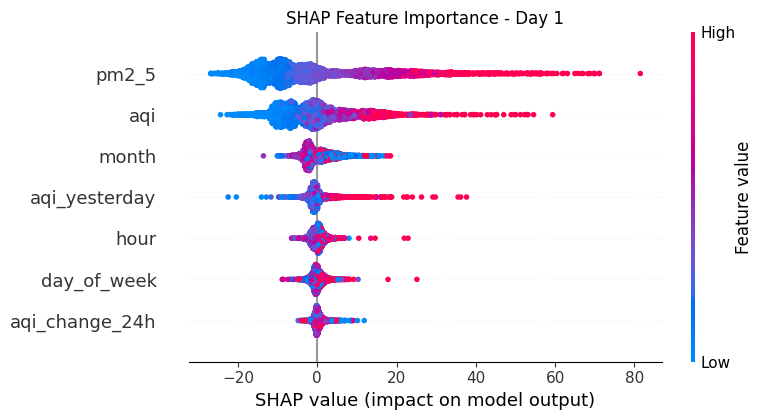

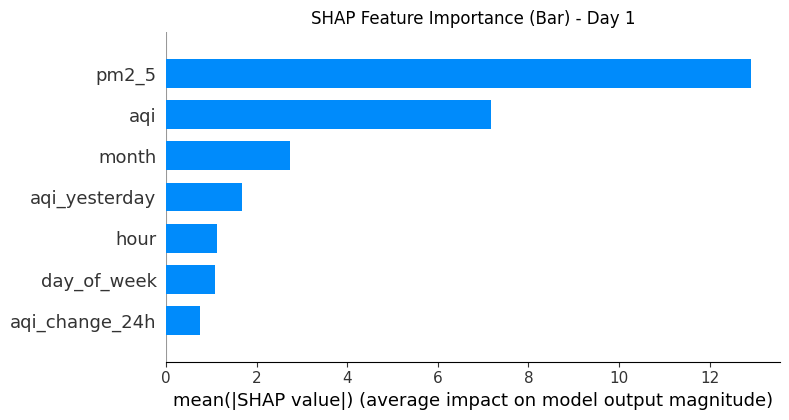

Feature Importance for Day 1:
  pm2_5: 12.9104
  aqi: 7.1820
  month: 2.7426
  aqi_yesterday: 1.6754
  hour: 1.1318
  day_of_week: 1.0818
  aqi_change_24h: 0.7386

SHAP Analysis for Day 2:


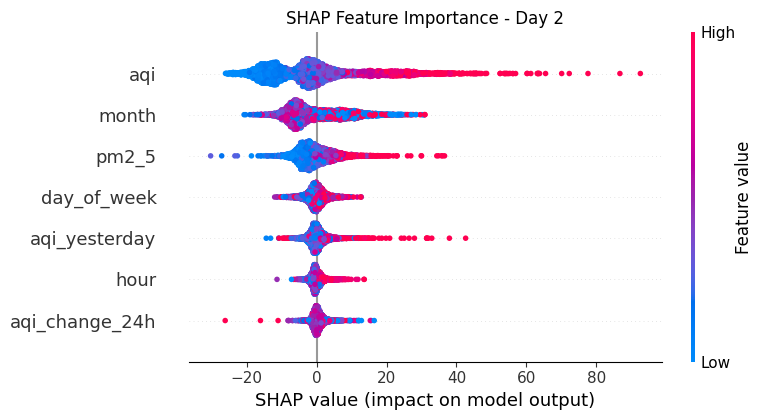

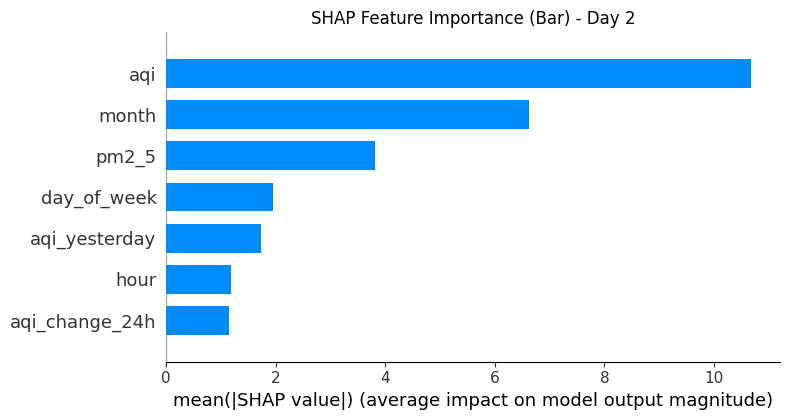

Feature Importance for Day 2:
  aqi: 10.6721
  month: 6.6283
  pm2_5: 3.8106
  day_of_week: 1.9464
  aqi_yesterday: 1.7355
  hour: 1.1746
  aqi_change_24h: 1.1535

SHAP Analysis for Day 3:


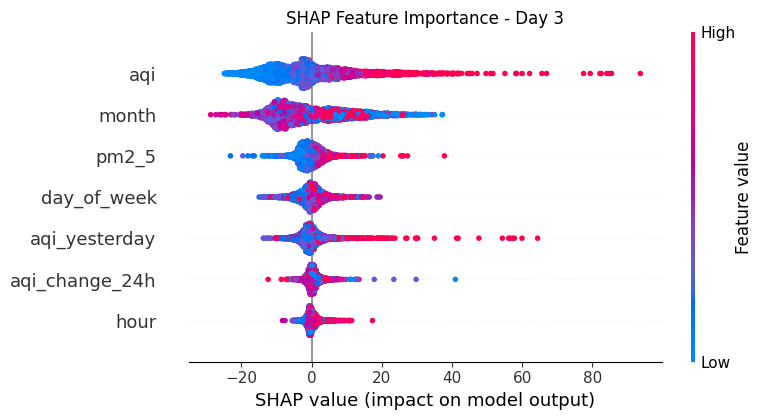

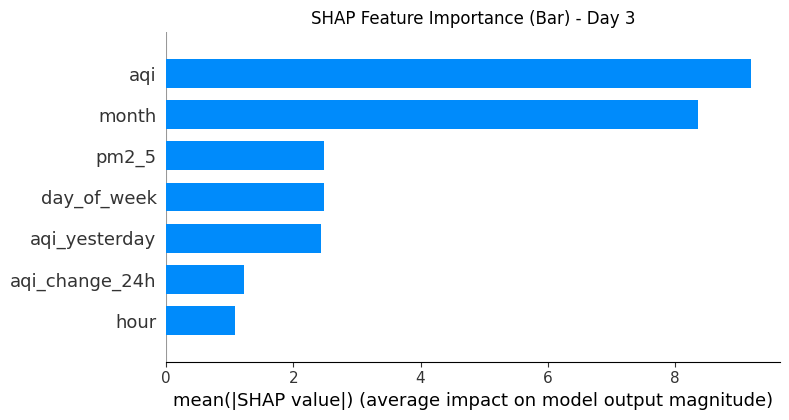

Feature Importance for Day 3:
  aqi: 9.1951
  month: 8.3717
  pm2_5: 2.4765
  day_of_week: 2.4750
  aqi_yesterday: 2.4298
  aqi_change_24h: 1.2297
  hour: 1.0874

Saving models to Hugging Face...


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  best_model_day1.pkl         :   1%|1         | 1.63MB /  147MB            

Day 1: RandomForest saved to Hugging Face


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  best_model_day2.pkl         :   2%|2         | 3.28MB /  141MB            

Day 2: RandomForest saved to Hugging Face


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  best_model_day3.pkl         :   8%|8         | 11.3MB /  139MB            

Day 3: RandomForest saved to Hugging Face

All models saved to: https://huggingface.co/Syed110-3/karachi-aqi-predictor/tree/main/models
Model training complete. Models saved to Hugging Face: Syed110-3/karachi-aqi-predictor


In [ ]:
# import pandas as pd
# import joblib
# import json
# from huggingface_hub import HfApi, login
# from datasets import load_dataset
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_absolute_error, r2_score
# import xgboost as xgb
# from sklearn.neural_network import MLPRegressor
# import shap
# import matplotlib.pyplot as plt

# HF_TOKEN = "hidden"
# REPO_ID = "Syed110-3/karachi-aqi-predictor"
# login(token=HF_TOKEN)

# def fetch_training_data():
#     dataset = load_dataset(REPO_ID)
#     df = dataset['train'].to_pandas()
#     print(f"Fetched {len(df)} rows from Hugging Face")
#     print(f"Features: {df.columns.tolist()}")
#     return df

# def train_and_compare():
#     df = fetch_training_data()
#     X = df[['hour', 'day_of_week', 'month', 'aqi', 'aqi_yesterday', 'aqi_change_24h', 'pm2_5']]
#     results = {}

#     for day_num in [1, 2, 3]:
#         target_col = f'target_day{day_num}'
#         y = df[target_col]

#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#         print(f"\nDay {day_num} - Training models")

#         models = {
#             'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
#             'Ridge': Ridge(alpha=1.0, random_state=42),
#             'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
#             'NeuralNetwork': MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)
#         }

#         day_results = {}
#         for name, model in models.items():
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)
#             mae = mean_absolute_error(y_test, y_pred)
#             r2 = r2_score(y_test, y_pred)
#             day_results[name] = {'model': model, 'mae': mae, 'r2': r2}
#             print(f"  {name}: MAE={mae:.2f}, R2={r2:.3f}")

#         best_name = min(day_results.items(), key=lambda x: x[1]['mae'])[0]
#         results[f'day{day_num}'] = {
#             'best_name': best_name,
#             'best_model': day_results[best_name]['model'],
#             'best_mae': day_results[best_name]['mae'],
#             'best_r2': day_results[best_name]['r2']
#         }
#         print(f"  Best: {best_name}, MAE={day_results[best_name]['mae']:.2f}")

#     return results, X_train, X_test

# def run_shap_analysis(best_model, X_train, X_test, day_num):
#     print(f"\nSHAP Analysis for Day {day_num}:")

#     if isinstance(best_model, RandomForestRegressor):
#         explainer = shap.TreeExplainer(best_model)
#         shap_values = explainer.shap_values(X_test)

#         # Summary plot
#         shap.summary_plot(shap_values, X_test, show=False)
#         plt.title(f'SHAP Feature Importance - Day {day_num}')
#         plt.tight_layout()
#         plt.show()

#         # Bar plot
#         shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
#         plt.title(f'SHAP Feature Importance (Bar) - Day {day_num}')
#         plt.tight_layout()
#         plt.show()

#         # Mean absolute SHAP values
#         shap_df = pd.DataFrame({
#             'feature': X_train.columns,
#             'importance': np.abs(shap_values).mean(0)
#         }).sort_values('importance', ascending=False)

#         print(f"Feature Importance for Day {day_num}:")
#         for idx, row in shap_df.iterrows():
#             print(f"  {row['feature']}: {row['importance']:.4f}")

#     elif isinstance(best_model, xgb.XGBRegressor):
#         explainer = shap.TreeExplainer(best_model)
#         shap_values = explainer.shap_values(X_test)

#         shap.summary_plot(shap_values, X_test, show=False)
#         plt.title(f'SHAP Feature Importance - Day {day_num}')
#         plt.tight_layout()
#         plt.show()

#     else:
#         print(f"SHAP not supported for {type(best_model).__name__}")
#         # Show feature importance from model if available
#         if hasattr(best_model, 'feature_importances_'):
#             importance = best_model.feature_importances_
#             feat_imp = pd.DataFrame({
#                 'feature': X_train.columns,
#                 'importance': importance
#             }).sort_values('importance', ascending=False)

#             print(f"Feature Importance for Day {day_num}:")
#             for idx, row in feat_imp.iterrows():
#                 print(f"  {row['feature']}: {row['importance']:.4f}")

# def save_to_huggingface_registry(results):
#     api = HfApi()

#     for day_num in [1, 2, 3]:
#         day_key = f'day{day_num}'
#         day_result = results[day_key]

#         model_filename = f'best_model_day{day_num}.pkl'
#         joblib.dump(day_result['best_model'], model_filename)

#         api.upload_file(
#             path_or_fileobj=model_filename,
#             path_in_repo=f"models/best_model_day{day_num}.pkl",
#             repo_id=REPO_ID,
#             repo_type="model"
#         )

#         model_info = {
#             'model_name': day_result['best_name'],
#             'mae': float(day_result['best_mae']),
#             'r2': float(day_result['best_r2']),
#             'features': ['hour', 'day_of_week', 'month', 'aqi', 'aqi_yesterday', 'aqi_change_24h', 'pm2_5'],
#             'target': f'target_day{day_num}',
#             'saved_at': pd.Timestamp.now().isoformat()
#         }

#         info_filename = f'model_info_day{day_num}.json'
#         with open(info_filename, 'w') as f:
#             json.dump(model_info, f, indent=2)

#         api.upload_file(
#             path_or_fileobj=info_filename,
#             path_in_repo=f"models/model_info_day{day_num}.json",
#             repo_id=REPO_ID,
#             repo_type="model"
#         )

#         print(f"Day {day_num}: {day_result['best_name']} saved to Hugging Face")

#     print(f"\nAll models saved to: https://huggingface.co/{REPO_ID}/tree/main/models")
#     return REPO_ID

# print("Starting model training with PM2.5...")
# results, X_train, X_test = train_and_compare()

# print("\nRunning SHAP analysis...")
# import numpy as np
# for day_num in [1, 2, 3]:
#     day_result = results[f'day{day_num}']
#     run_shap_analysis(day_result['best_model'], X_train, X_test, day_num)

# print("\nSaving models to Hugging Face...")
# repo_id = save_to_huggingface_registry(results)

# print(f"Model training complete. Models saved to Hugging Face: {repo_id}")

In [1]:
import requests
from datetime import datetime

def get_karachi_aqi_simple():
    url = "https://air-quality-api.open-meteo.com/v1/air-quality"
    params = {"latitude": 24.8607, "longitude": 67.0011, "current": "pm2_5"}

    try:
        data = requests.get(url, params=params, timeout=5).json()
        pm25 = data['current']['pm2_5']
        timestamp = data['current']['time']
        aqi = round((pm25 / 35.4) * 100)
        return max(0, min(500, aqi)), timestamp
    except:
        return None, None

# One line call
aqi, timestamp = get_karachi_aqi_simple()
print(f"Karachi AQI: {aqi} | Time: {timestamp}")

Karachi AQI: 88 | Time: 2026-01-26T13:00
